In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Categorical, concat, DataFrame, get_dummies, read_table, Series
def readin_small_data():
    """Read small data set into a 2D numpy array
    return: numpy array contains the small data set, shape: (50,000, 230)
    """
    PATH = os.getcwd()
    DATA = os.path.join(PATH, 'orange_small_train','orange_small_train.data')
    with open(DATA) as f:
        header = f.readline().strip('\n').split('\t')
    
    data_type = {key:np.float64 for key in header[:190]}
    data_type.update({key:str for key in header[190:]})
    return pd.read_table(DATA, dtype=data_type)
    
def readin_label(target):
    """Read upselling, churn or appetency label into a 2D numpy array
    parameter target: choose which label to load
    return: numpy array contains the specified label of small data set, shape: (50,000, 1)
    """
    assert target in ['upselling', 'churn', 'appetency']
    PATH = os.getcwd()
    DATA = os.path.join(PATH, 'orange_small_train','orange_small_train_'+target+'.labels.txt')

    with open(DATA) as f:
        lines = f.readlines()
        data = list(map(lambda x: True if x.strip() == '1' else False, lines))

    return np.array(data)[:,np.newaxis]

data = readin_small_data()
print(data.shape)
upselling_label = readin_label('upselling')
print(upselling_label.shape)
churn_label = readin_label('churn')
print(churn_label.shape)
appetency_label = readin_label('appetency')
print(appetency_label.shape)

(50000, 230)
(50000, 1)
(50000, 1)
(50000, 1)


In [3]:
PATH = os.getcwd()
DATA = os.path.join(PATH, 'orange_small_train','orange_small_train.data')
appetency = read_table(
    os.path.join(PATH, 'orange_small_train', 'orange_small_train_appetency.labels.txt').replace('\\', '/'),
    header=None).ix[:, 0].astype('category')

appetency.cat.rename_categories(['no', 'yes'], inplace=True)

appetency

/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
49970     no
49971    yes
49972    yes
49973     no
49974     no
49975     no
49976     no
49977     no
49978     no
49979     no
49980     no
49981     no
49982     no
49983     no
49984     no
49985     no
49986     no
49987     no
49988     no
49989     no
49990     no
49991     no
49992     no
49993     no
49994     no
49995    yes
49996    yes
49997     no
49998     no
49999     no
Name: 0, Length: 50000, dtype: category
Categories (2, object): [no, yes]

In [4]:
na_strings = [
  '',
  'na', 'n.a', 'n.a.',
  'nan', 'n.a.n', 'n.a.n.',
  'NA', 'N.A', 'N.A.',
  'NaN', 'N.a.N', 'N.a.N.',
  'NAN', 'N.A.N', 'N.A.N.',
  'nil', 'Nil', 'NIL',
  'null', 'Null', 'NULL']

X = read_table(
    os.path.join(PATH, 'orange_small_train','orange_small_train.data').replace('\\', '/'),
    na_values=na_strings)

x_var_names = X.columns
#cs.loc[:, 'SeriousDlqin2yrs'] = Categorical(cs.SeriousDlqin2yrs)

#nb_samples = len(cs)

#cs
X

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


In [5]:
x_types = {x_var_name: X[x_var_name].dtype for x_var_name in x_var_names}

for x_var_name in x_var_names:
    if x_types[x_var_name] == int:
        x = X[x_var_name].astype(float)
        X.ix[:, x_var_name] = x
        x_types[x_var_name] = x.dtype
    elif x_types[x_var_name] != float:
        x = X[x_var_name].astype('category')
        X.ix[:, x_var_name] = x
        x_types[x_var_name] = x.dtype

x_types

/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


{'Var1': dtype('float64'),
 'Var10': dtype('float64'),
 'Var100': dtype('float64'),
 'Var101': dtype('float64'),
 'Var102': dtype('float64'),
 'Var103': dtype('float64'),
 'Var104': dtype('float64'),
 'Var105': dtype('float64'),
 'Var106': dtype('float64'),
 'Var107': dtype('float64'),
 'Var108': dtype('float64'),
 'Var109': dtype('float64'),
 'Var11': dtype('float64'),
 'Var110': dtype('float64'),
 'Var111': dtype('float64'),
 'Var112': dtype('float64'),
 'Var113': dtype('float64'),
 'Var114': dtype('float64'),
 'Var115': dtype('float64'),
 'Var116': dtype('float64'),
 'Var117': dtype('float64'),
 'Var118': dtype('float64'),
 'Var119': dtype('float64'),
 'Var12': dtype('float64'),
 'Var120': dtype('float64'),
 'Var121': dtype('float64'),
 'Var122': dtype('float64'),
 'Var123': dtype('float64'),
 'Var124': dtype('float64'),
 'Var125': dtype('float64'),
 'Var126': dtype('float64'),
 'Var127': dtype('float64'),
 'Var128': dtype('float64'),
 'Var129': dtype('float64'),
 'Var13': dtype('fl

Split data into Training, Validation & Test sets:

In [6]:
from sklearn.cross_validation import StratifiedShuffleSplit
from random import seed
RANDOM_SEED = 99
seed(RANDOM_SEED)

test_proportion = .6
split = StratifiedShuffleSplit(
    y=appetency,
    n_iter=1,
    test_size=test_proportion,
    random_state=RANDOM_SEED)

for train_valid_indices, test_indices in split:
    X_train_valid, X_test = X.iloc[train_valid_indices, :], X.iloc[test_indices, :]
    appetency_train_valid, appetency_test = appetency.iloc[train_valid_indices], appetency.iloc[test_indices]
    
    
valid_proportion_of_train_valid = .25
split = StratifiedShuffleSplit(
    y=appetency_train_valid,
    n_iter=1,
    test_size=valid_proportion_of_train_valid,
    random_state=RANDOM_SEED)

for train_indices, valid_indices in split:
    X_train, X_valid = X_train_valid.iloc[train_indices, :], X_train_valid.iloc[valid_indices, :]
    appetency_train, appetency_valid = appetency_train_valid[train_indices], appetency_train_valid[valid_indices]

/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


To double-check that the data have been split representatively, the incidences of churn in the 3 data sets are as follows:

In [7]:
from numpy import allclose, exp, float, int, linspace, log, nan, sqrt

appetency_data_sets = dict(
    train=appetency_train,
    valid=appetency_valid,
    test=appetency_test)

data_set_summaries = DataFrame(index=['train', 'valid', 'test'])
data_set_summaries['nb_samples'] = nan
data_set_summaries['appetency_incidence'] = nan

for appetency_data_set_name in appetency_data_sets:
    appetency_data_set = appetency_data_sets[appetency_data_set_name]
    nb_samples = len(appetency_data_set)
    data_set_summaries.ix[appetency_data_set_name, :] =\
        nb_samples, (appetency_data_set == 'yes').sum() / nb_samples

data_set_summaries

/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


,nb_samples,appetency_incidence
train,15000.0,0.0074
valid,5000.0,0.0076
test,30000.0,0.0178


Note that we have a "skewed classes" problem: one of the classes of cases (here the "yes" appetency class) is significantly rarer than the other.

Data Cleaning

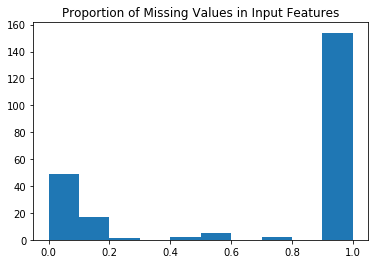

In [8]:
from matplotlib.pyplot import figure, legend, hist, plot, title

nb_train_samples = data_set_summaries.nb_samples['train']

input_features_missing_proportions = X_train.isnull().sum() / nb_train_samples

hist(input_features_missing_proportions)
title('Proportion of Missing Values in Input Features')

We can see that there are an awful lot of features with all missing data!! We'll kick them out, for sure. Also, there are a small handful of features that have over 20% missing data; since those are few and we are unlikely to miss out too many signals by removing them, let's not mess around with them either. In sum, we'll remove all features that have over 20% missing value:

In [9]:
x_var_names = input_features_missing_proportions[input_features_missing_proportions <= .2].index

x_var_names

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')

In [10]:
len(x_var_names)

66

In [15]:
#The classes of these variables are:
X_train = X_train[x_var_names]

x_types = {x_var_name: X_train[x_var_name].dtype for x_var_name in x_var_names}

X_train.shape

(15000, 66)

Filling Missing Numeric x's with Means

In [12]:
#The following x's are float:
float_x_var_names = [x_var_name for x_var_name in x_var_names
                     if x_types[x_var_name] == float]
X_train[float_x_var_names].std()
X_train[float_x_var_names].isnull().sum() / nb_train_samples #The missing value proportions of the float columns are

Var6      0.111067
Var7      0.110333
Var13     0.110333
Var21     0.111067
Var22     0.099667
Var24     0.146600
Var25     0.099667
Var28     0.099800
Var35     0.099667
Var38     0.099667
Var44     0.099667
Var57     0.000000
Var65     0.110333
Var73     0.000000
Var74     0.110333
Var76     0.099667
Var78     0.099667
Var81     0.111067
Var83     0.099667
Var85     0.099667
Var109    0.146600
Var112    0.099667
Var113    0.000000
Var119    0.111067
Var123    0.099667
Var125    0.110333
Var132    0.099667
Var133    0.099667
Var134    0.099667
Var140    0.110333
Var143    0.099667
Var144    0.111067
Var149    0.146600
Var153    0.099667
Var160    0.099667
Var163    0.099667
Var173    0.099667
Var181    0.099667
dtype: float64

Let’s fill up the missing values with the means of the respective columns:

In [13]:
float_x_means = X_train.mean()

for float_x_var_name in float_x_var_names:
    x = X_train[float_x_var_name]
    missing_value_row_yesno = x.isnull()
    if missing_value_row_yesno.sum() > 0:
        X_train.ix[missing_value_row_yesno.tolist(), float_x_var_name] =\
            float_x_means[float_x_var_name]
X_train[float_x_var_names].isnull().sum() / nb_train_samples #all 0
allclose(X_train.mean(), float_x_means) #the means stay the same as before

/afs/inf.ed.ac.uk/user/s17/s1717961/miniconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


True

In [27]:
#Below are categorical features and their number of categories:
categorical_x_var_names = [x_var_name for x_var_name in x_var_names
                           if x_types[x_var_name] != float]

categorical_x_nb_levels = X_train[categorical_x_var_names].apply(lambda col: len(col.cat.categories))

#Those variables having over 500 categories are likely to be just text / character data. Let's get rid of them:
categorical_x_var_names = categorical_x_nb_levels[categorical_x_nb_levels <= 500].index




For the remaining categorical variables, let's:

    Make their missing values another category zzzMISSING; and

    Try to consolidate the categories, as having too many categories make modeling less meaningful and numerically more difficult; for each variable, we'll collapse all categories with prevalence of under 5% together into a zzzOTHER category;

    Drop categorical variables with only one category (obviously); and

    Drop categorical variables with only one non-zzzMISSING category.



In [28]:
collapsed_categories = {}
removed_categorical_x_var_names = set()

for categorical_x_var_name in categorical_x_var_names:
  
    missing_value_row_yesno = X_train[categorical_x_var_name].isnull()
    if missing_value_row_yesno.sum() > 0:
        X_train[categorical_x_var_name].cat.add_categories('zzzMISSING', inplace=True)
        X_train.ix[missing_value_row_yesno.tolist(), categorical_x_var_name] = 'zzzMISSING'

    x = X_train[categorical_x_var_name].copy()
    for category in x.cat.categories:
        matching_rows_yesno = x == category
        if matching_rows_yesno.sum() < .05 * nb_train_samples:
            if categorical_x_var_name in collapsed_categories:
                collapsed_categories[categorical_x_var_name].append(category) 
            else:
                collapsed_categories[categorical_x_var_name] = [category]
            if 'zzzOTHER' not in X_train[categorical_x_var_name].cat.categories:
                X_train[categorical_x_var_name].cat.add_categories('zzzOTHER', inplace=True)
            X_train.ix[matching_rows_yesno, categorical_x_var_name] = 'zzzOTHER'
            X_train[categorical_x_var_name].cat.remove_categories(category, inplace=True)
  
    categories = X_train[categorical_x_var_name].cat.categories
    if (len(categories) == 1) or\
        (len(set(categories) - set(['zzzMISSING', 'zzzOTHER'])) < 2):
        removed_categorical_x_var_names.add(categorical_x_var_name)

categorical_x_var_names = list(set(categorical_x_var_names) - removed_categorical_x_var_names)

In [29]:
#Let's double-check by looking at the prevalence of the categories of the remaining categorical variables now:
from ChicagoBoothML_Helpy.EvaluationMetrics import bin_class_dev, bin_classif_eval
from ChicagoBoothML_Helpy.Print import printflush

for categorical_x_var_name in categorical_x_var_names:
    printflush(categorical_x_var_name.upper(), ':', sep='')
    x = X_train[categorical_x_var_name]
    printflush(
        Series({category: (x == category).sum() / nb_train_samples\
         for category in x.cat.categories}))
    printflush()

ModuleNotFoundError: No module named 'ChicagoBoothML_Helpy'

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from multiprocessing import cpu_count
from sklearn.cross_validation import StratifiedShuffleSplit
from random import seed
RANDOM_SEED = 99
seed(RANDOM_SEED)
B = 1200

rf_model = RandomForestClassifier(
    n_estimators=B,
    criterion='entropy',
    max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    min_samples_split=100,
    min_samples_leaf=50,
    min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=cpu_count() - 2,   # paralellize over all CPU cores but 2
    class_weight=None,    # our classes are skewed, but but too skewed
    random_state=RANDOM_SEED,
    verbose=0,
    warm_start=False)

rf_model.fit(X=get_dummies(X_train), y=appetency_train)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
B = 2400

boost_model = GradientBoostingClassifier(
    n_estimators=B,
    loss='deviance',   # a.k.a Cross Entropy in Classification
    learning_rate=.01,   # shrinkage parameter
    subsample=1.,
    min_samples_split=200,
    min_samples_leaf=100,
    min_weight_fraction_leaf=0.0,
    max_depth=10,   # maximum tree depth / number of levels of interaction
    init=None,
    random_state=RANDOM_SEED,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    verbose=0,
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    warm_start=False)

boost_model.fit(X=get_dummies(X_train), y=appetency_train)

In [ ]:
low_prob = 1e-6
high_prob = 1 - low_prob
log_low_prob = log(low_prob)
log_high_prob = log(high_prob)
log_prob_thresholds = linspace(start=log_low_prob, stop=log_high_prob, num=100)
prob_thresholds = exp(log_prob_thresholds)

In [ ]:
rf_pred_probs = rf_model.predict_proba(X=get_dummies(X_valid))
rf_oos_performance = bin_classif_eval(
    rf_pred_probs[:, 1], churn_valid == 'yes',
    pos_cat='yes', thresholds=prob_thresholds)

boost_pred_probs = boost_model.predict_proba(X=get_dummies(X_valid))
boost_oos_performance = bin_classif_eval(
    boost_pred_probs[:, 1], churn_valid == 'yes', 
    pos_cat='yes', thresholds=prob_thresholds)


In [ ]:
figure(figsize=(8, 6))
plot(
    [0, 1], [0, 1],
    linestyle='dotted')
plot(
    1 - rf_oos_performance.specificity,
    rf_oos_performance.recall,
    label='Random Forest')
plot(
    1 - boost_oos_performance.specificity,
    boost_oos_performance.recall,
    label='Boosted Trees')
title('ROC Curves (Validation Data)')
legend(loc='right')

In [5]:
labels = np.hstack([appetency_label, churn_label, upselling_label])

In [6]:
labels = np.hstack([labels, ~np.any(labels, axis=1)[:,np.newaxis]])

In [7]:
labels = labels.astype(int)

In [8]:
missing_rate = data.isnull().sum() / data.shape[0]

numerical_data = data.loc[:, data.columns[:190]]
numerical_missing_rate = numerical_data.isnull().sum() / numerical_data.shape[0]
useful_numerical_data = numerical_data.loc[:, numerical_missing_rate < 0.5]

categorical_data = data.loc[:, data.columns[190:]]
categorical_missing_data = categorical_data.isnull().sum() / categorical_data.shape[0]
useful_categorical_data = categorical_data.loc[:, categorical_missing_data < 0.5]

# useful_numerical_data.to_csv('numerical_data.csv')
# useful_categorical_data.to_csv('categorical_data.csv')
# sns.distplot(numerical_data.isnull().sum(axis=1) / data.shape[0], kde=False, rug=True, bins=10)
# t=numerical_data.isnull().sum(axis=1) / numerical_data.shape[1]
clean_numerical_data = useful_numerical_data.fillna(useful_numerical_data.mean())
clean_categorical_data = useful_categorical_data.fillna(useful_categorical_data.mode().iloc[0])

In [9]:
clean_numerical_data.as_matrix().shape

(50000, 41)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import keras
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=41))
#model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=100, activation='relu'))

model.add(Dense(units=4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1),
              metrics=['accuracy'])

trainX, valX, trainY, valY = train_test_split(preprocessing.robust_scale(clean_numerical_data), labels, test_size=0.2, random_state=42)

model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data = (valX, valY))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 2s 45us/step - loss: 0.7316 - acc: 0.8212 - val_loss: 0.6023 - val_acc: 0.8392
Epoch 2/10
40000/40000 [==============================] - 1s 37us/step - loss: 0.7900 - acc: 0.8293 - val_loss: 0.6471 - val_acc: 0.8341
Epoch 3/10
40000/40000 [==============================] - 1s 36us/step - loss: 0.6396 - acc: 0.8332 - val_loss: 0.6541 - val_acc: 0.8300
Epoch 4/10
40000/40000 [==============================] - 1s 36us/step - loss: 0.6225 - acc: 0.8339 - val_loss: 0.6128 - val_acc: 0.8389
Epoch 5/10
40000/40000 [==============================] - 1s 35us/step - loss: 0.6508 - acc: 0.8328 - val_loss: 0.6586 - val_acc: 0.8335
Epoch 6/10
40000/40000 [==============================] - 1s 34us/step - loss: 0.6285 - acc: 0.8341 - val_loss: 0.6030 - val_acc: 0.8387
Epoch 7/10
40000/40000 [==============================] - 1s 35us/step - loss: 0.6229 - acc: 0.8361 - val_loss: 0.5971 - val_acc

In [31]:
t[t>0.95]

Series([], dtype: float64)

In [ ]:
def readin_large_data():
    """Read small data set into a 2D numpy array
    return: numpy array contains the small data set, shape: (50,000, 230)
    """
    PATH = os.getcwd()
    data = []
    
    for i in range(1, 6):
        DATA = os.path.join(PATH, 'orange_large_train','orange_large_train.data.chunk' + str(i))
        with open(DATA) as f:
            line = f.readline()
            while line != '':
                data.append(line.strip('\n').split('\t'))
                line = f.readline()
    data = np.array(data)
    vect_None = np.vectorize(lambda x: x if x != '' else None)
    vect_int = np.vectorize(lambda x: float(x) if x != None else None)
    data = vect_None(data)
    data[:, :14740] = vect_int(data[:, :14740])
    return data
large_data = readin_large_data()
print(large_data.shape)

In [81]:
print('Percent of upselling: ', np.sum(upselling_label) / len(upselling_label))
print('Percent of churn: ', np.sum(churn_label) / len(churn_label))
print('Percent of appetency: ', np.sum(appetency_label) / len(appetency_label))

Percent of upselling:  0.07364
Percent of churn:  0.07344
Percent of appetency:  0.0178


In [135]:
print('Pecent of missing value: ', np.sum(data == None) / (data.shape[0] * data.shape[1]))

Pecent of missing value:  0.697752347826087


In [40]:
print('Pecent of missing value: ', data.isnull().sum().sum() / (data.shape[0] * data.shape[1]))

Pecent of missing value:  0.697752347826087


(array([ 28.,  38.,   1.,   0.,   2.,   5.,   0.,   2.,   0., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

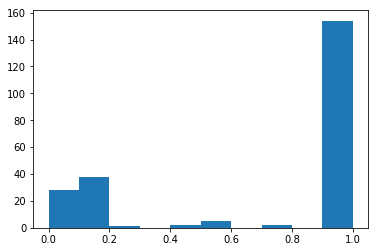

In [4]:
missing_rate = data.isnull().sum() / data.shape[0]
plt.hist(missing_rate)

In [48]:
np.sum((missing_rate < 0.5)[190:])

28

In [45]:
np.sum(missing_rate > 0.9)

154

(array([ 28.,  38.,   1.,   0.,   2.,   5.,   0.,   2.,   0., 154.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

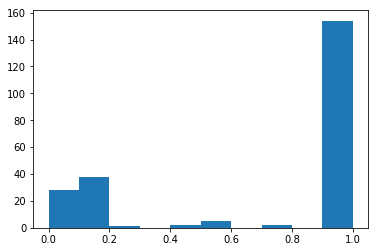

In [110]:
plt.hist(missing_rate)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


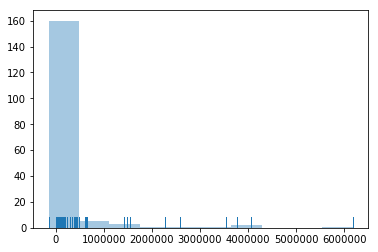

In [112]:
means = np.nanmean(numerical_data, axis=0)
sns.distplot(means[~np.isnan(means)], kde=False, rug=True, bins=10)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


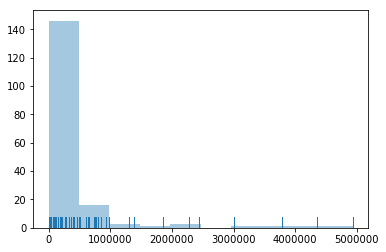

In [131]:
stds = np.nanstd(numerical_data, axis=0)
sns.distplot(stds[~np.isnan(stds) & (stds <10000000)], kde=False, rug=True, bins=10)

In [123]:
np.where(stds>10000000)

/Users/weiichi/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([130]),)

In [126]:
numerical_data[500:1000,130]

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [129]:
PATH = os.getcwd()
DATA = os.path.join(PATH, 'orange_small_train','orange_small_train.data')

data1 = []
with open(DATA) as f:
    line = f.readline()
    line = f.readline()
    while line != '':
        data1.append(line.strip('\n').split('\t'))
        line = f.readline()
data1 = np.array(data1)
data1[500:1000,130]

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '0', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '0', '', '', '', '', '', 

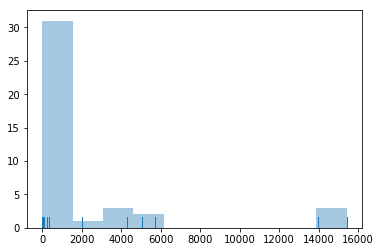

In [113]:
categories_count = np.apply_along_axis(lambda x: len(set(x)), 0, categorical_data)
sns.distplot(categories_count, kde=False, rug=True, bins=10)